In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/sample_data/Iris.csv")

In [ ]:
len(df)

150

In [ ]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#dropping id as it is of no use in analytics
df1=df.drop("Id",axis='columns')
df1.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
#splitting dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
#normalisation step --making all the inputs to the same range
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.90639078, -0.20293772, -1.08574815, -1.20189288],
       [-0.90639078,  0.91856021, -1.25033462, -1.07165681],
       [ 2.45122471,  1.59145896,  1.54763524,  1.14235639],
       [-0.09593187,  1.59145896, -1.030886  , -1.07165681],
       [ 1.29342626,  0.02136187,  0.72470293,  0.49117604],
       [-1.13795047,  0.02136187, -1.08574815, -1.20189288],
       [-0.90639078,  0.46996104, -1.19547246, -1.20189288],
       [ 1.06186658, -1.32443565,  1.21846232,  0.88188425],
       [-0.90639078, -1.77303482, -0.15309153, -0.16000432],
       [ 0.5987472 ,  0.69426062,  1.10873801,  1.66330067],
       [-1.13795047, -0.20293772, -1.19547246, -1.33212895],
       [ 0.25140766, -1.9973344 ,  0.77956508,  0.49117604],
       [-0.21171172, -1.32443565,  0.17608139, -0.02976824],
       [-0.79061094,  0.91856021, -1.19547246, -1.07165681],
       [ 0.01984797, -0.87583648,  0.83442724,  1.01212032],
       [-1.13795047,  0.69426062, -1.08574815, -1.20189288],
       [-1.60106985, -0.

In [ ]:
#creating model using knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
len(y_test)

45

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [ ]:
label=['Iris-setosa','Iris-versicolor','Iris-virginica']
mat=confusion_matrix(y_pred,y_test)
mat

array([[ 9,  0,  0],
       [ 0, 19,  2],
       [ 0,  0, 15]])

In [ ]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[ 9,  0,  0],
       [ 0, 19,  0],
       [ 0,  2, 15]])

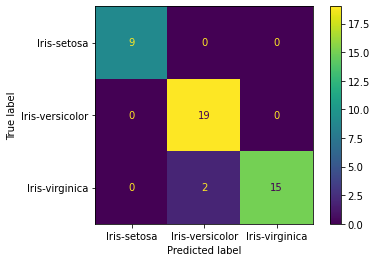

In [ ]:
#confusion matrix display
cmd_display=ConfusionMatrixDisplay(mat,display_labels=label)
cmd_display.plot()

In [ ]:
#accuracy score
score=accuracy_score(y_pred,y_test)
score

0.9555555555555556